# Egg AI project

## Author: Dravyn, Jasmin, Jeff, Oleks

#### Original Dataset: Md Anowar Hossen Faysal, Md Rasel Ahmed, Md Masudur Rahaman

#### Dataset: https://www.kaggle.com/datasets/faysal1998/environmental-effect-on-egg-production
1. Amount_of_chicken: The number of chickens in the farm or enclosure.

2. Amount_of_Feeding: The quantity of food fed to the chickens, likely in kilograms or pounds.

3. Ammonia: Ammonia level in the chicken coop or enclosure. Ammonia is a gas that is produced by the decomposition of chicken waste and can be harmful to chickens in high concentrations.

4. Temperature: The temperature inside the chicken coop or enclosure, measured in degrees Celsius (C).

5. Humidity: The humidity inside the chicken coop or enclosure, measured in percentage.

6. Light_Intensity: The intensity of light in the chicken coop or enclosure.

7. Noise: The noise level in the chicken coop or enclosure, measured in decibels (dB).

8. Total_egg_production: The total number of eggs produced by the chickens.


**Missing Values** <br>
None

# Look at the Big Picture

## Frame the Problem
1. Supervised Learning
2. A regression task
3. Batch Learning
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

In [18]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the dataset

url = "https://raw.githubusercontent.com/ItsJJH/egg-ai-project/develop/Egg_Production.csv"
eggs = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
egg_backup = eggs

In [3]:
eggs

,Amount_of_chicken,Amount_of_Feeding,Ammonia,Temperature,Humidity,Light_Intensity,Noise,Total_egg_production
0,2728,170,14.4,29.3,51.7,364,214,2115
1,2728,175,17.6,29.3,52.3,369,235,1958
2,2728,175,15.0,29.3,52.5,373,237,1990
3,2728,170,15.0,29.3,49.7,372,240,2015
4,2728,170,15.9,29.2,51.4,381,237,2112
...,...,...,...,...,...,...,...,...
476,2735,180,14.4,29.0,49.5,341,224,2065
477,2735,185,14.9,29.5,50.7,317,202,2202
478,2735,180,16.0,29.5,49.3,346,197,1972
479,2732,195,13.4,30.0,51.7,325,183,2120


In [4]:
eggs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount_of_chicken     481 non-null    int64  
 1   Amount_of_Feeding     481 non-null    int64  
 2   Ammonia               481 non-null    float64
 3   Temperature           481 non-null    float64
 4   Humidity              481 non-null    float64
 5   Light_Intensity       481 non-null    int64  
 6   Noise                 481 non-null    int64  
 7   Total_egg_production  481 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 30.2 KB


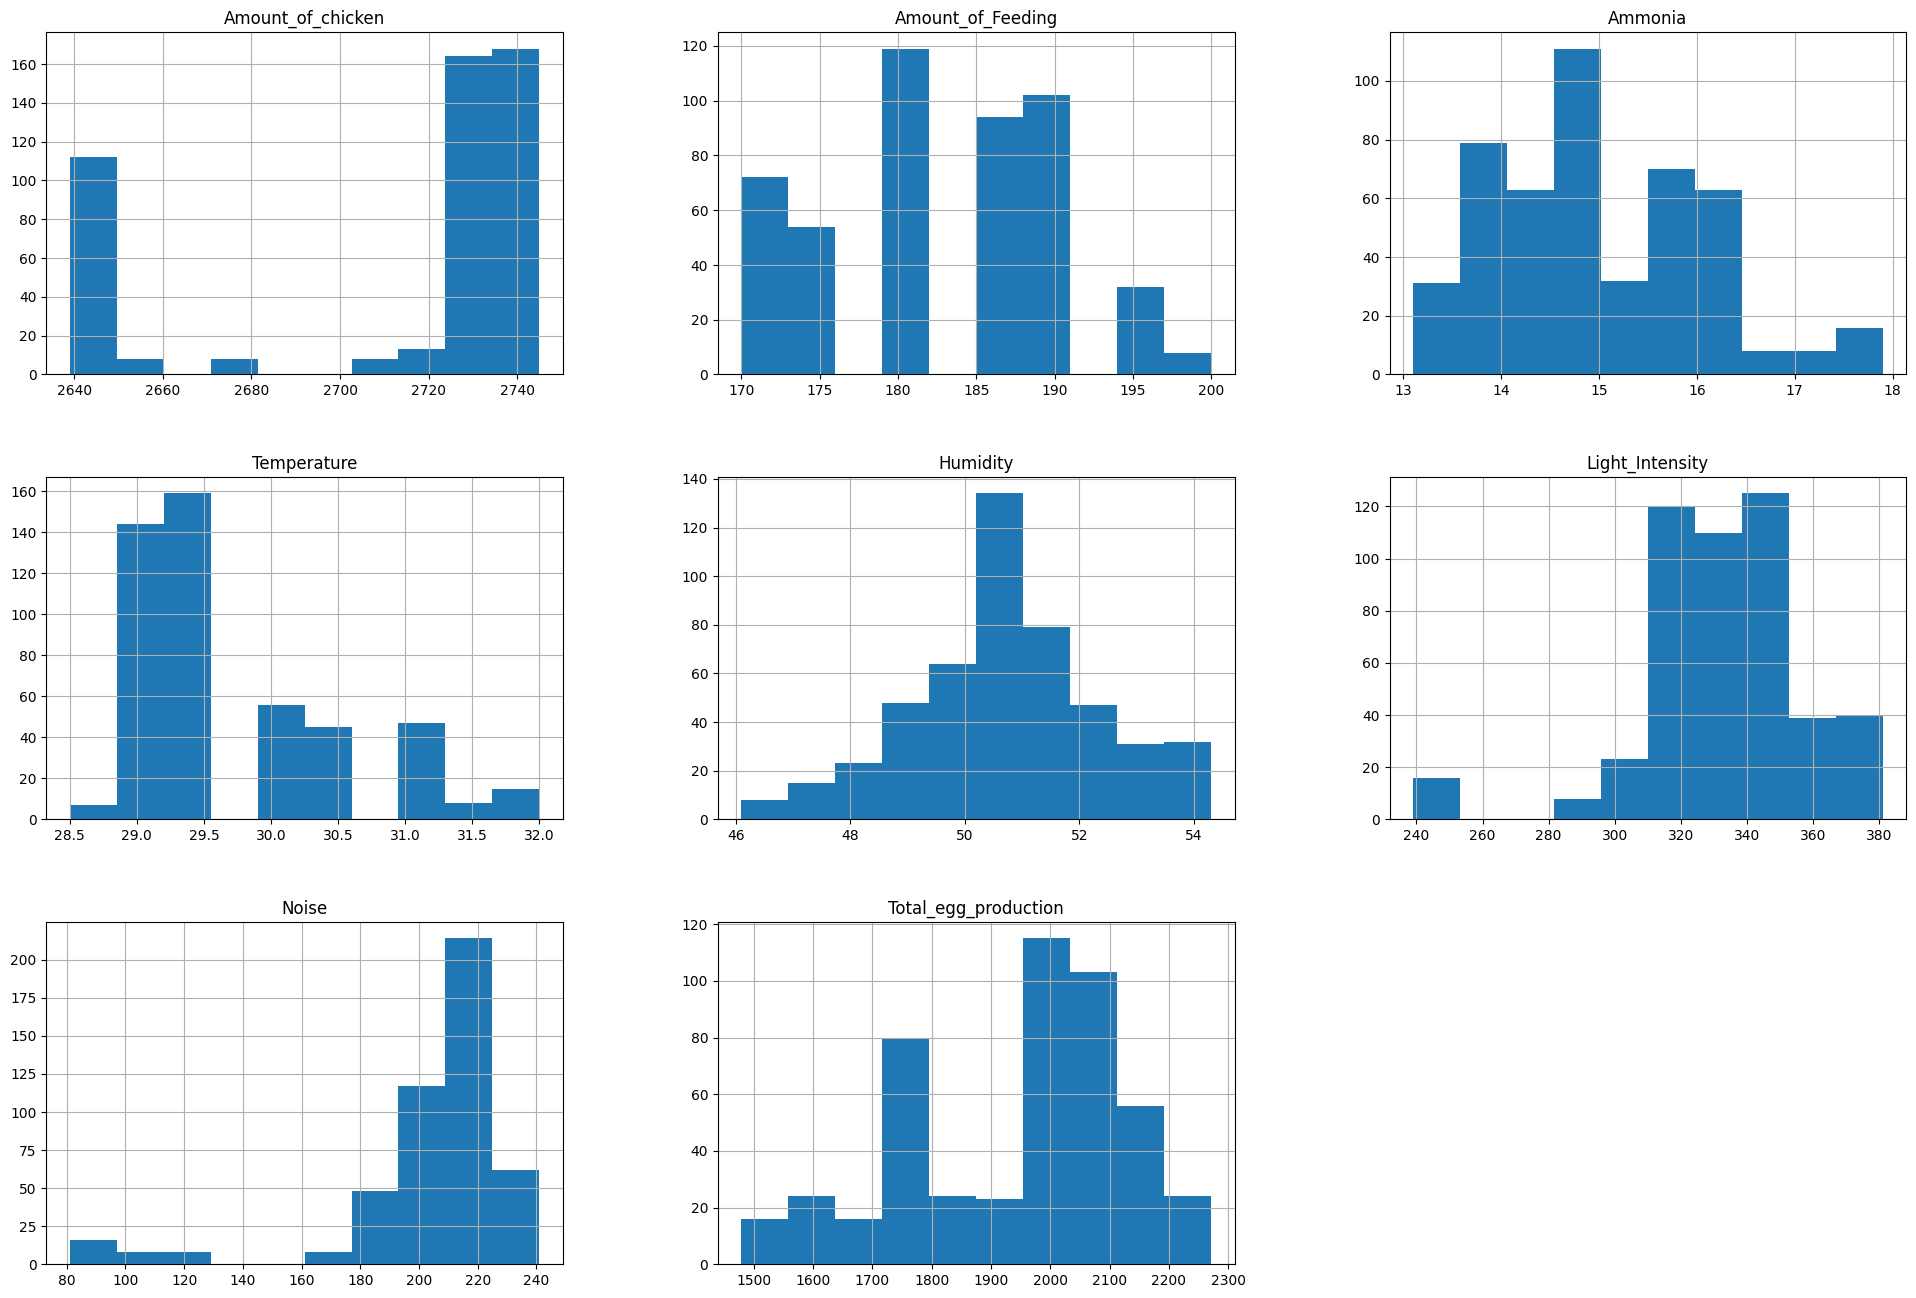

In [5]:
eggs.hist(figsize=(24, 16))
plt.show()

C:\Users\jeffr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


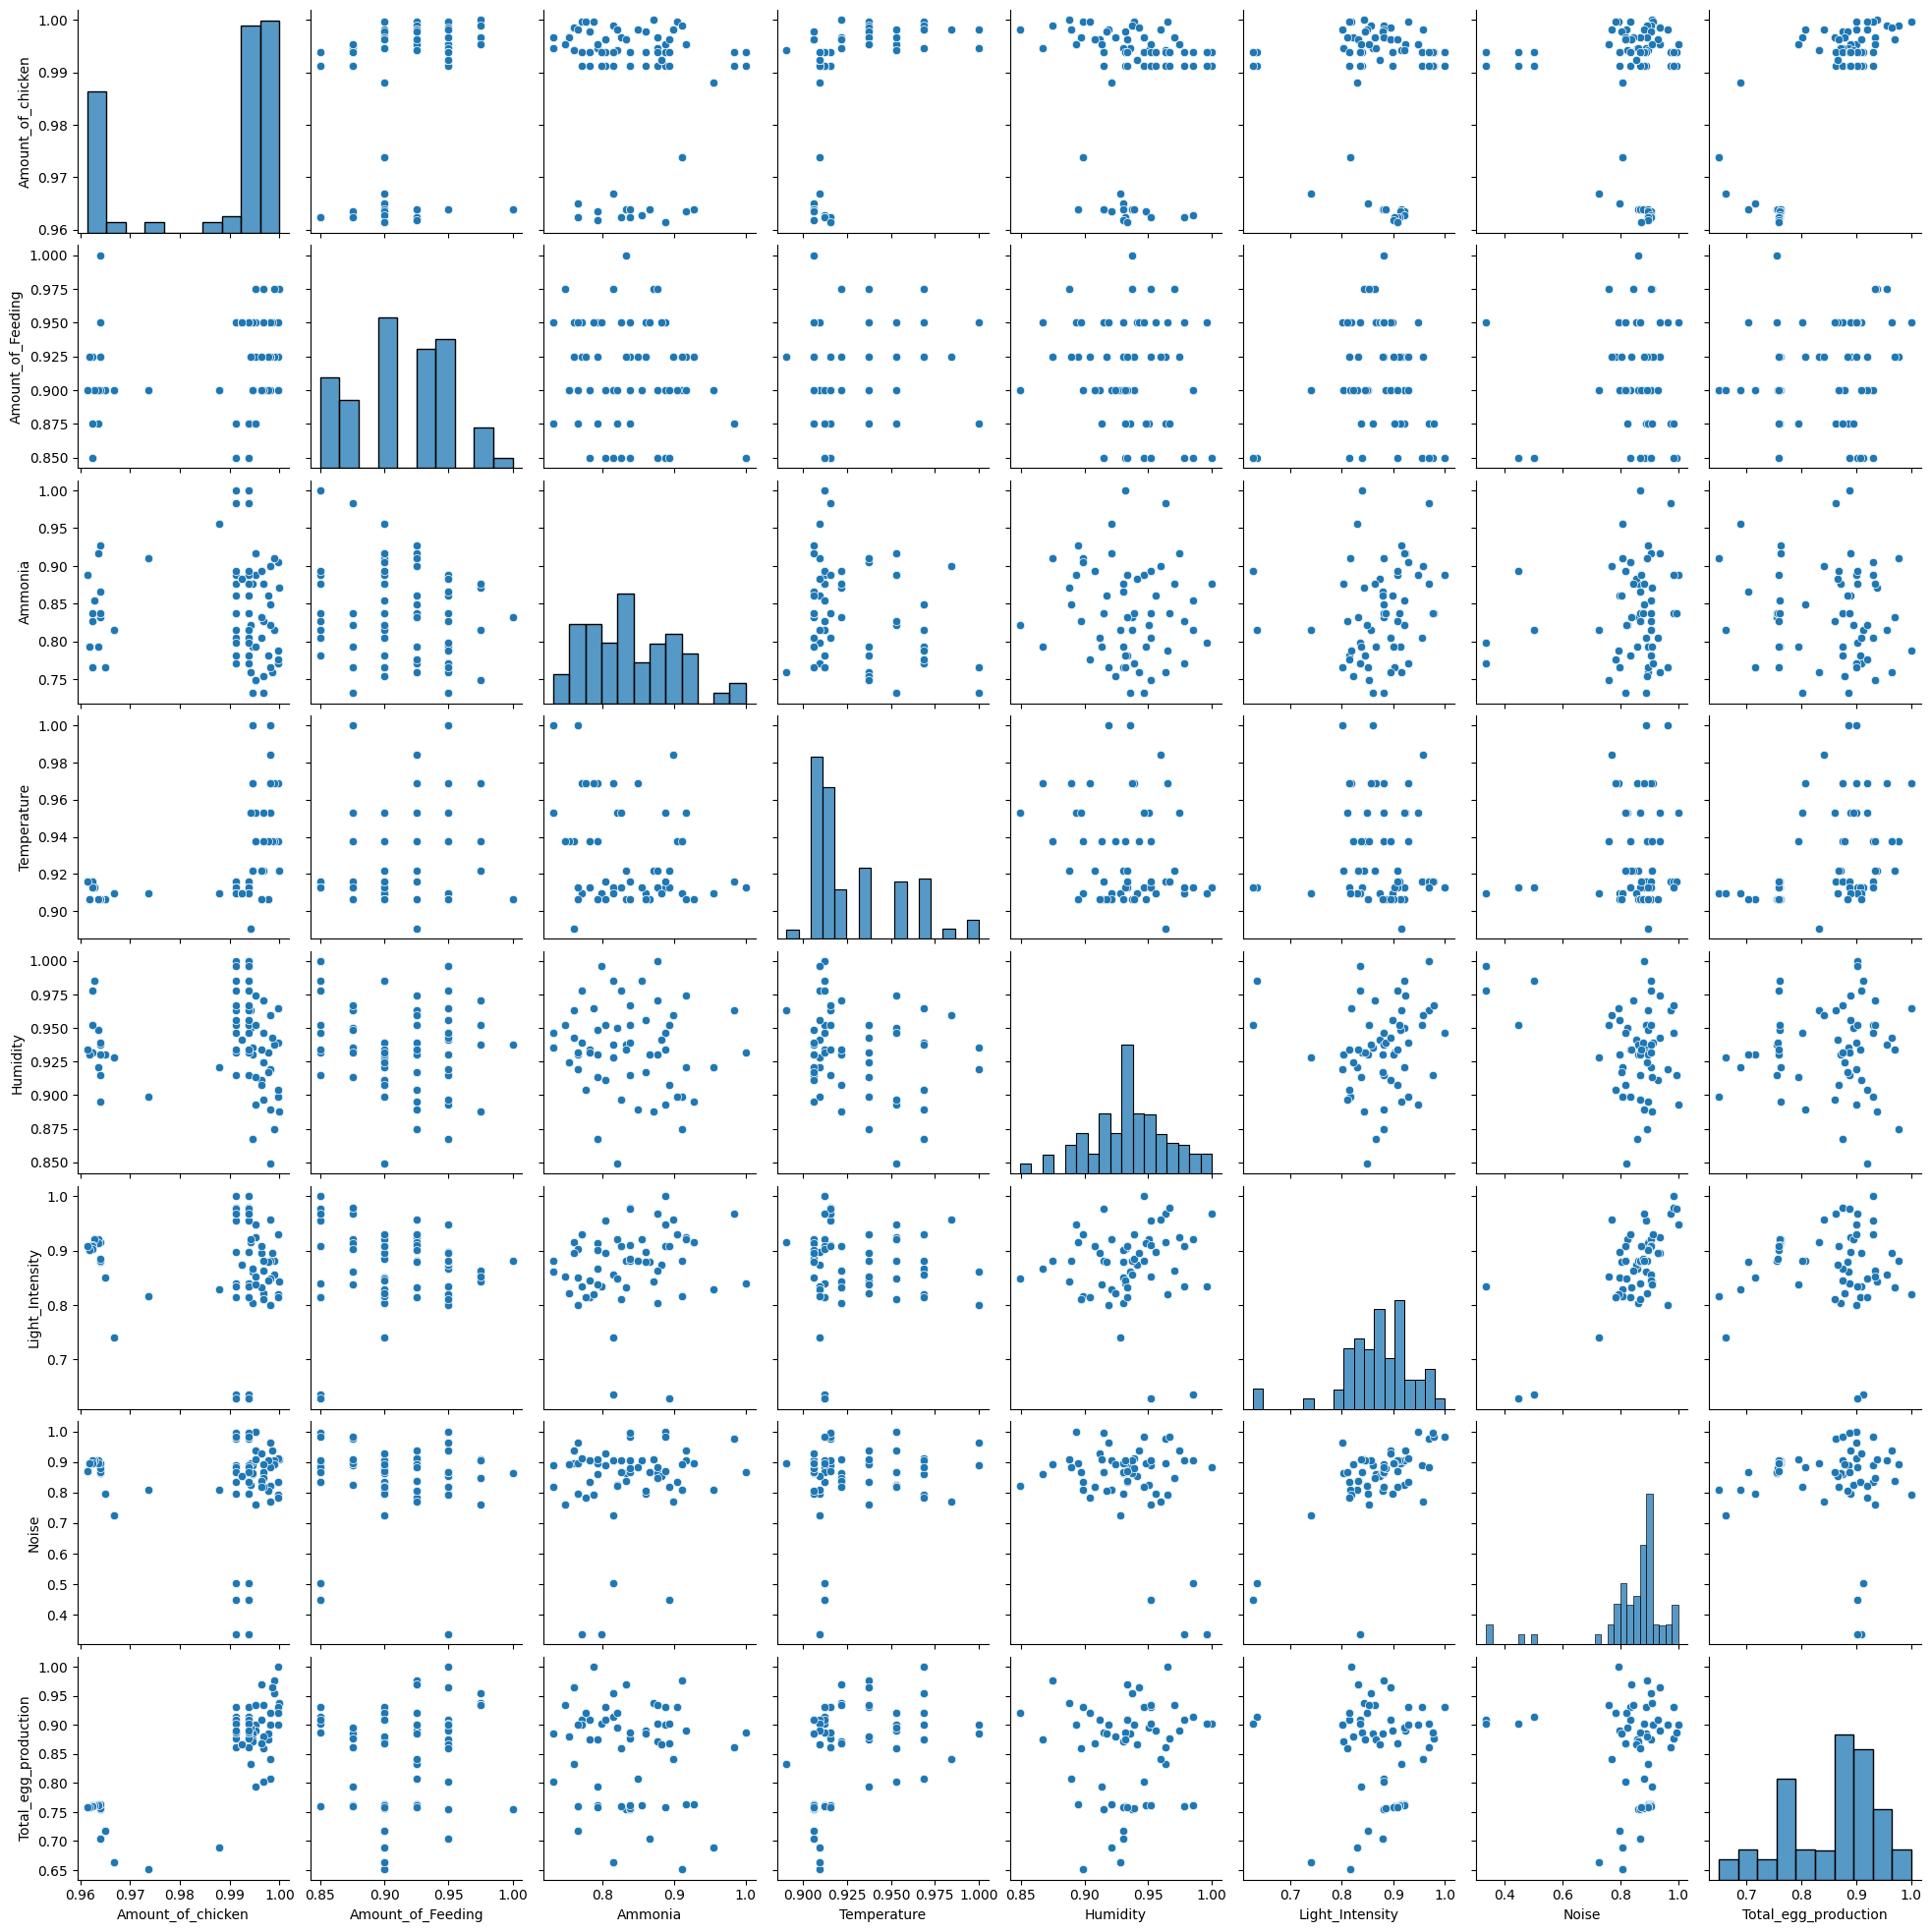

In [19]:
sns.pairplot(eggs)

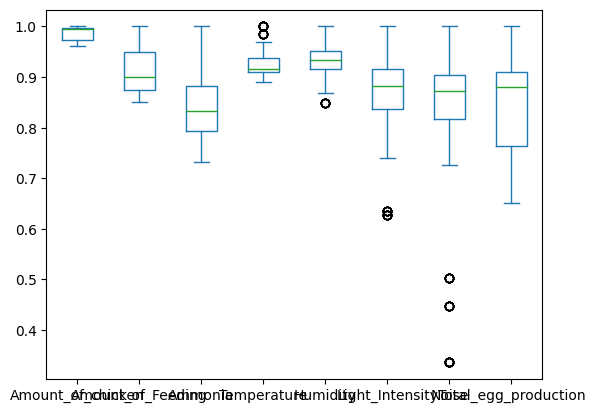

In [20]:
eggs.plot.box()
plt.show()

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [13]:
num_cols = eggs.select_dtypes(include='number')
num_cols.describe()

scaler = MinMaxScaler()

num_cols_scaled = scaler.fit_transform(num_cols)
preprocessing = ColumnTransformer([('num', scaler, num_cols.columns)], remainder='passthrough')

In [14]:
feature_names = eggs.columns.values.tolist()
eggs_scaled = preprocessing.fit_transform(eggs)

eggs_prepared = pd.DataFrame(data=eggs_scaled, columns=feature_names)
eggs_prepared1 = eggs_prepared.drop(labels='Total_egg_production', axis=1)

In [15]:
eggs_prepared1

,Amount_of_chicken,Amount_of_Feeding,Ammonia,Temperature,Humidity,Light_Intensity,Noise
0,0.839623,0.000000,0.270833,0.228571,0.682927,0.880282,0.83125
1,0.839623,0.166667,0.937500,0.228571,0.756098,0.915493,0.96250
2,0.839623,0.166667,0.395833,0.228571,0.780488,0.943662,0.97500
3,0.839623,0.000000,0.395833,0.228571,0.439024,0.936620,0.99375
4,0.839623,0.000000,0.583333,0.200000,0.646341,1.000000,0.97500
...,...,...,...,...,...,...,...
476,0.905660,0.333333,0.270833,0.142857,0.414634,0.718310,0.89375
477,0.905660,0.500000,0.375000,0.285714,0.560976,0.549296,0.75625
478,0.905660,0.333333,0.604167,0.285714,0.390244,0.753521,0.72500
479,0.877358,0.833333,0.062500,0.428571,0.682927,0.605634,0.63750
